In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier


In [2]:
data=pd.read_csv(r"..\data\raw_data.csv")

print(data)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0      1.0      168      0      1.0   
1      53    1   0       140   203    1      0.0      155      1      3.1   
2      70    1   0       145   174    0      1.0      125      1      2.6   
3      61    1   0       148   203    0      1.0      161      0      0.0   
4      62    0   0       138   294    1      1.0      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0      1.0      164      1      0.0   
1021   60    1   0       125   258    0      0.0      141      1      2.8   
1022   47    1   0       110   275    0      0.0      118      1      1.0   
1023   50    0   0       110   254    0      0.0      159      0      0.0   
1024   54    1   0       120   188    0      1.0      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1024 non-null   float64
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1023 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 112.2 KB
None


In [4]:
null_count = data.isnull().sum()
print(null_count)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     1
thalach     0
exang       0
oldpeak     2
slope       0
ca          0
thal        0
target      0
dtype: int64


In [5]:
data.fillna(data.mean(), inplace=True)

In [6]:
null_count = data.isnull().sum()
print(null_count)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   float64
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 112.2 KB
None


In [8]:
print("First few rows of the data:")
print(data.head(15)[['oldpeak']])

First few rows of the data:
    oldpeak
0       1.0
1       3.1
2       2.6
3       0.0
4       1.9
5       1.0
6       4.4
7       0.8
8       0.8
9       3.2
10      1.6
11      3.0
12      0.7
13      4.2
14      1.0


In [9]:
numerical_cols = ["age","sex","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","ca","target"]

In [10]:
scaler = MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

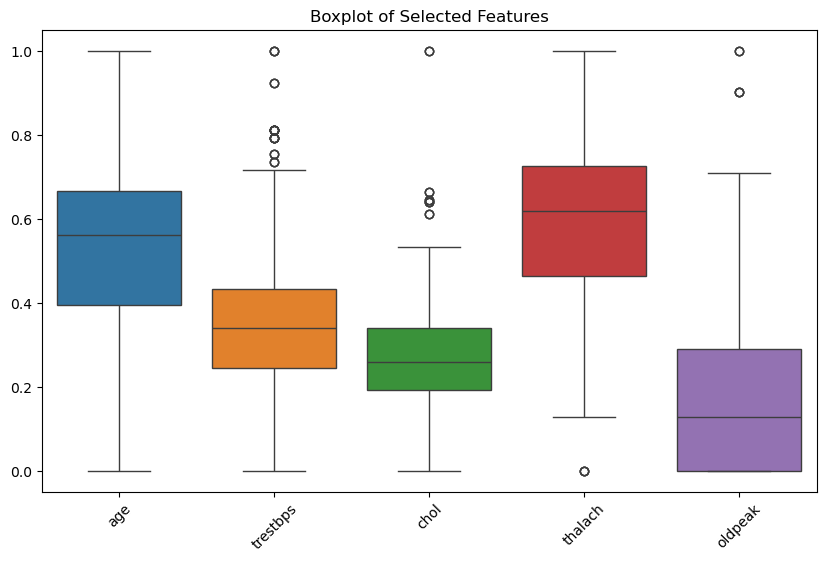

In [11]:
plt.figure(figsize=(10, 6))

# Determine the required features.
selected_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]

# Drawing BoxPlot.
sns.boxplot(data=data[selected_features])
plt.xticks(rotation=45)   #Rotate column names to make them clear.
plt.title("Boxplot of Selected Features")
plt.show()

In [12]:
def detect_outliers(df, features):
    outlier_indices = {}

    for feature in features:
        # Calculate the first quarter (Q1) and the third quarter (Q3).
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        IQR = Q3 - Q1  

        # Determine the lower and upper limits.
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identifying outliers.
        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)].index
        outlier_indices[feature] = outliers.tolist()

        # Print the number of outliers for each feature.
        print(f"Feature '{feature}' has {len(outliers)} outliers.")

    return outlier_indices

# Identify numerical features
numerical_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]

# Call the function to detect outliers
outliers_dict = detect_outliers(data, numerical_features)

Feature 'age' has 0 outliers.
Feature 'trestbps' has 30 outliers.
Feature 'chol' has 16 outliers.
Feature 'thalach' has 4 outliers.
Feature 'oldpeak' has 7 outliers.


In [13]:

def detect_important_outliers(df, features, threshold=0.05):
    """ 
    Detects significant outliers only based on how much they affect the data.
    threshold: The acceptable percentage change in the mean after removing outliers.
    """
    cleaned_df = df.copy()  # Create a copy of the original data.
    
    for feature in features:
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identifying outliers.
        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
        
        if not outliers.empty:
           # Calculate the average before deleting
            mean_before = df[feature].mean()
            
            # Remove outliers
            cleaned_feature = df[feature][~df.index.isin(outliers.index)]
            mean_after = cleaned_feature.mean()
            
            # Impact comparison
            change = abs(mean_after - mean_before) / mean_before
            
            # Delete values ​​only if they affect the data by more than the specified threshold.
            if change > threshold:
                cleaned_df = cleaned_df.drop(index=outliers.index)
                print(f"Removed {len(outliers)} outliers from '{feature}' due to high impact.")
            else:
                print(f"Kept outliers in '{feature}' as they have low impact.")

    return cleaned_df

# Specify numerical features only
numerical_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]

# Data cleaning while keeping outliers insignificant
cleaned_data = detect_important_outliers(data, numerical_features)



Kept outliers in 'trestbps' as they have low impact.
Kept outliers in 'chol' as they have low impact.
Kept outliers in 'thalach' as they have low impact.
Kept outliers in 'oldpeak' as they have low impact.


In [14]:
numerical_features = ["age", "trestbps", "chol", "thalach", "oldpeak"] # Numerical features

# Calculate the limits for each numerical feature
for feature in numerical_features:
    upper_limit = data[feature].mean() + 3 * data[feature].std()
    lower_limit = data[feature].mean() - 3 * data[feature].std()

    print(f"🔹 {feature}: Upper limit = {upper_limit}, Lower limit = {lower_limit}")


🔹 age: Upper limit = 1.096896188358254, Lower limit = -0.037140090797278424
🔹 trestbps: Upper limit = 0.8505835974830406, Lower limit = -0.14092874244392417
🔹 chol: Upper limit = 0.6273459603163157, Lower limit = -0.07940075483686371
🔹 thalach: Upper limit = 1.1231398288503434, Lower limit = 0.06944255804222776
🔹 oldpeak: Upper limit = 0.7413902664279491, Lower limit = -0.39556994037869486


In [15]:
numerical_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]  # Numerical features

# Find the extreme values ​​for each numerical feature.
outliers_dict = {}  # Dictionary to store extreme values ​​for each feature

for feature in numerical_features:
    upper_limit = data[feature].mean() + 3 * data[feature].std()
    lower_limit = data[feature].mean() - 3 * data[feature].std()

    # Extract extreme values ​​for this feature
    outliers = data.loc[(data[feature] > upper_limit) | (data[feature] < lower_limit)]
    
    # Save extreme values ​​in the dictionary
    outliers_dict[feature] = outliers

    print(f"🔹 {feature}: Found {len(outliers)} outliers.")

# Display extreme values ​​for each numerical feature
outliers_dict


🔹 age: Found 0 outliers.
🔹 trestbps: Found 7 outliers.
🔹 chol: Found 13 outliers.
🔹 thalach: Found 4 outliers.
🔹 oldpeak: Found 7 outliers.


{'age': Empty DataFrame
 Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
 Index: [],
 'trestbps':           age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
 151  0.520833  1.0   1  0.924528  0.358447  0.0      0.0  0.946565    0.0   
 175  0.562500  0.0   0  1.000000  0.369863  1.0      0.0  0.473282    1.0   
 246  0.520833  1.0   1  0.924528  0.358447  0.0      0.0  0.946565    0.0   
 294  0.562500  0.0   0  1.000000  0.369863  1.0      0.0  0.473282    1.0   
 326  0.520833  1.0   1  0.924528  0.358447  0.0      0.0  0.946565    0.0   
 508  0.562500  0.0   0  1.000000  0.369863  1.0      0.0  0.473282    1.0   
 688  0.562500  0.0   0  1.000000  0.369863  1.0      0.0  0.473282    1.0   
 
       oldpeak  slope    ca  thal  target  
 151  0.000000      2  0.25     3     0.0  
 175  0.645161      0  0.50     3     0.0  
 246  0.000000      2  0.25     3     0.0  
 294  0.645161      0  0.50     3     0.0  
 

In [16]:
# Create a copy of the data to remove only outliers from unimportant features.
cleaned_data = data.copy()

for feature in numerical_features:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Only keep values ​​that are not out of the normal range.
    cleaned_data = cleaned_data.loc[(cleaned_data[feature] >= lower_bound) & (cleaned_data[feature] <= upper_bound)]

# Print the number of rows before and after deletion
print("🔹before removing outliers:", len(data))
print("🔹after removing outliers:", len(cleaned_data))
print("🔹outliers:", len(data) - len(cleaned_data))
data=cleaned_data


🔹before removing outliers: 1025
🔹after removing outliers: 968
🔹outliers: 57


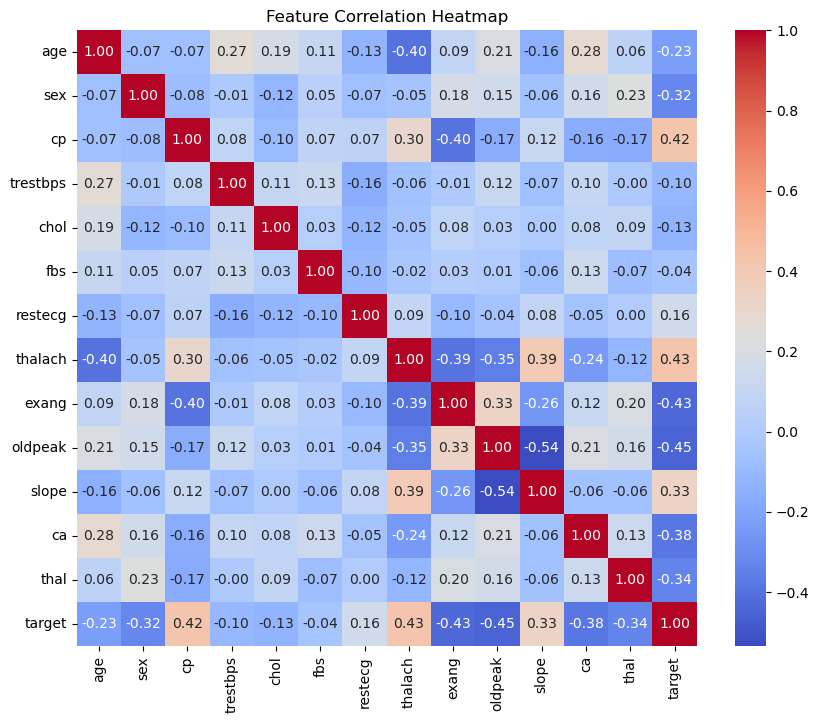


📌 Features ranked by correlation with target:
thalach     0.427200
cp          0.422152
slope       0.333978
restecg     0.156821
fbs        -0.037932
trestbps   -0.104933
chol       -0.133325
age        -0.228869
sex        -0.319633
thal       -0.335024
ca         -0.379418
exang      -0.433572
oldpeak    -0.449329
Name: target, dtype: float64


In [17]:
#calculate matrix
correlation_matrix = data.corr()

#drawing Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()
threshold = 0.5  # Define threshold for strong correlation
correlation_with_target = correlation_matrix['target'].drop('target').sort_values(ascending=False)
print("\n📌 Features ranked by correlation with target:")
print(correlation_with_target)
